In [1]:
import cv2
import os
import glob
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt


In [2]:
 pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [3]:
mura_Dir = "MURA-v1.1/"
train_imgs_path=pd.read_csv(mura_Dir+'train_image_paths.csv',names=["Train Dataset"])
train_labels=pd.read_csv(mura_Dir+'train_labeled_studies.csv',names=["Train Labeled Studies","label"])
test_imgs_path=pd.read_csv(mura_Dir+'valid_image_paths.csv',names=["Test Dataset"])
test_labels=pd.read_csv(mura_Dir+'valid_labeled_studies.csv',names=["Test Labeled Studies","labels"])


In [4]:
train_imgs_path_numpy_Unspervised=train_imgs_path['Train Dataset'].to_numpy()
test_imgs_path_numpy_Unspervised=test_imgs_path['Test Dataset'].to_numpy()


In [45]:
def convertThenumpy(_numpy):
    nData=[]
    for i in range(0,len(_numpy)):
        f1=_numpy[i]
        for image_path in glob.glob(f1):
            _imgs = imageio.imread(image_path)
            nData.append(_imgs)
    return nData    


In [8]:
cv2.imshow('image',testData_Unspervised[333])
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
trainData_Unspervised=convertThenumpy(train_imgs_path_numpy_Unspervised)
testData_Unspervised=convertThenumpy(test_imgs_path_numpy_Unspervised)

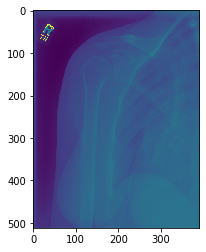

In [9]:
plt.imshow(trainData_Unspervised[333])
plt.show() 

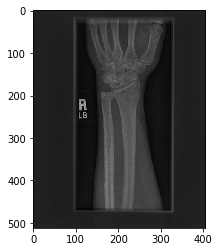

In [10]:
plt.imshow(testData_Unspervised[333])
plt.show() 

In [27]:
train_labels_one = train_labels[train_labels['label'] ==1]

In [28]:
train_labels_zero=train_labels[train_labels['label'] ==0]

In [29]:
train_labels.shape

(13457, 2)

In [21]:
train_labels_one.shape

(5177, 2)

In [22]:
train_labels_zero.shape

(8280, 2)

In [31]:

test_labels_one = test_labels[test_labels['labels'] ==1]
test_labels_zero = test_labels[test_labels['labels'] ==0]

In [35]:
train_imgs_path_numpy_spervised_label_One=train_labels_one['Train Labeled Studies'].to_numpy()
train_imgs_path_numpy_spervised_label_Zero=train_labels_zero['Train Labeled Studies'].to_numpy()


In [38]:
test_imgs_path_numpy_spervised_label_One=test_labels_one['Test Labeled Studies'].to_numpy()
test_imgs_path_numpy_spervised_label_Zero=test_labels_zero['Test Labeled Studies'].to_numpy()


In [53]:
type(test_imgs_path_numpy_spervised_label_Zero)

numpy.ndarray

In [82]:

f=test_imgs_path_numpy_spervised_label_Zero[3]

In [83]:
img_dir = f # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
i=0
for f1 in files:
    i=i+1
    img = cv2.imread(f1)
    data.append(img)
    mydata = np.array(data)
print("Shape od D matrix :",mydata.shape)


Shape od D matrix : (4, 512, 407, 3)


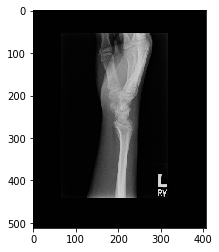

In [84]:
plt.imshow(data[1])
plt.show() 